[0.97918459 0.00570155 0.00786053 0.00583983 0.02254077 0.06136037
 0.04879753 0.06515618 0.02946458 0.00366611 0.03197986 0.00456503
 0.04227164 0.02820898 0.06310365 0.02437319 0.00972587 0.03766138
 0.03184416 0.04618632 0.0124202  0.04774491 0.0119169  0.06758913
 0.05345765 0.03256328 0.02781952 0.00533172 0.00721426 0.05446544
 0.02375888 0.03126858]
[0.34030266-5.61950095e-17j 0.15586023+1.56538763e-17j
 0.16444839+1.05520462e-17j 0.15700184+4.03872236e-18j
 0.1238606 +2.43113800e-17j 0.20823667-1.53839550e-17j
 0.18556877-7.43132915e-18j 0.18052116-8.49963058e-19j
 0.1764263 +3.15324828e-18j 0.12240428+1.46996941e-17j
 0.15062038+7.49757379e-18j 0.18090879-9.29059013e-18j
 0.15420145+1.66599428e-18j 0.1733893 -1.98129486e-18j
 0.16442647+7.28964304e-19j 0.15888388+5.46177217e-18j
 0.16318366+1.14254125e-17j 0.2070029 -1.37729087e-17j
 0.16107628+3.30897522e-18j 0.16922797+1.33986204e-18j
 0.12802843+8.36138848e-18j 0.156313  +8.05817357e-18j
 0.17322441-1.69320221e-18j 0.179033

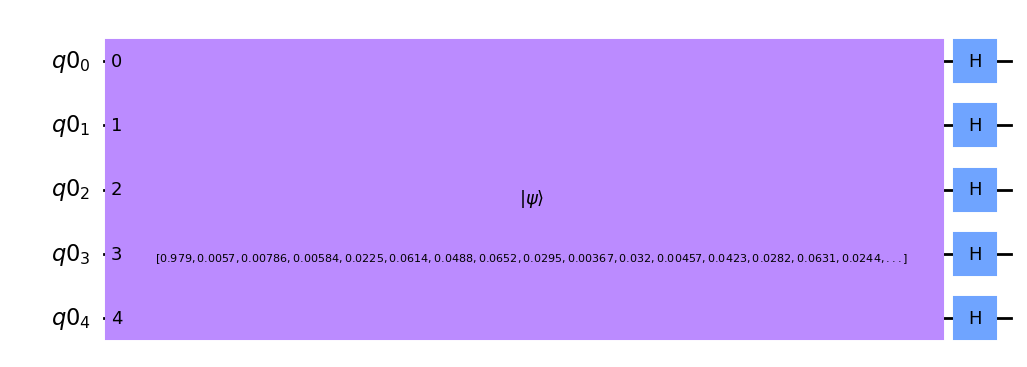

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jan 22 22:57:58 2023

@author: phy71
"""
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit import BasicAer
from scipy.linalg import hadamard

backend = BasicAer.get_backend('statevector_simulator')

n = 32
input_vector = np.random.rand(n)

#Hybrid Quantum-Classical HT
x = np.copy(input_vector)
b = sum(x)
delta = (b-x[0])/np.sqrt(n)
x[0] =b
c = np.sqrt(sum(x**2))
x = x/c

q = QuantumRegister(5)
qc = QuantumCircuit(q)
qc.initialize(x, [q[0],q[1], q[2], q[3], q[4]])
qc.h(q)
job = backend.run(transpile(qc, backend))
qc_state = job.result().get_statevector(qc)
y1 = c*abs(qc_state)-delta

#Classical HT
y2 = np.matrix([input_vector])@hadamard(n)/np.sqrt(n)
print(x)
print(qc_state)
print(y1)
print(y2)

qc.draw()

In [2]:
qc.draw()

Traceback (most recent call last):
  Cell In[2], line 1
    qc.draw()
NameError: name 'qc' is not defined

Use %tb to get the full traceback.
